# **Introduction:**
In this notebook, I make plots and see correlations and distributions of each category on the dataset Spotify Tracks DB.
Since as a Music lover and a Data analyst, it’s revealing to know what people are listening to on Spotify. 

**Questions:**
* What kind of music genres are popular?
* Which genre has more tracks than others?
* How long are most tracks?

# **Import Libraries, download and inspect data**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
# Download useful modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('C:\Users\subhojit das\Desktop\SpotifyFeatures.csv')
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
207743,World,Passion,More To Come - Live,52zMLutXNrudtVisjYka57,50,0.06630,0.255,400160,0.567,0.00000,C,0.1010,-7.745,Major,0.0384,149.801,4/4,0.135
141548,Indie,Charli XCX,Out Of My Head (feat. Tove Lo and ALMA),1So1tVk3gybvc2I0JY8K22,60,0.07360,0.851,235737,0.709,0.00137,C#,0.1200,-5.157,Minor,0.0694,116.467,4/4,0.420
19116,Dance,Selena Gomez,Magic,10xcIQQEJSEIOgG1HvS3t9,51,0.00577,0.614,169250,0.919,0.00000,B,0.3340,-3.011,Minor,0.0413,104.063,4/4,0.514
205076,Soundtrack,Henry Jackman,Upgrades,41C3mwgoM3bBmRysFgYfVD,27,0.11200,0.399,147213,0.506,0.79900,G,0.0551,-12.044,Major,0.0463,130.046,4/4,0.121
193088,Soul,Donny Hathaway,The Ghetto,1yeIxOEFmpQ3qlOb2R3g2m,57,0.37000,0.739,413773,0.523,0.19400,F,0.1770,-10.462,Minor,0.0303,113.939,4/4,0.826


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


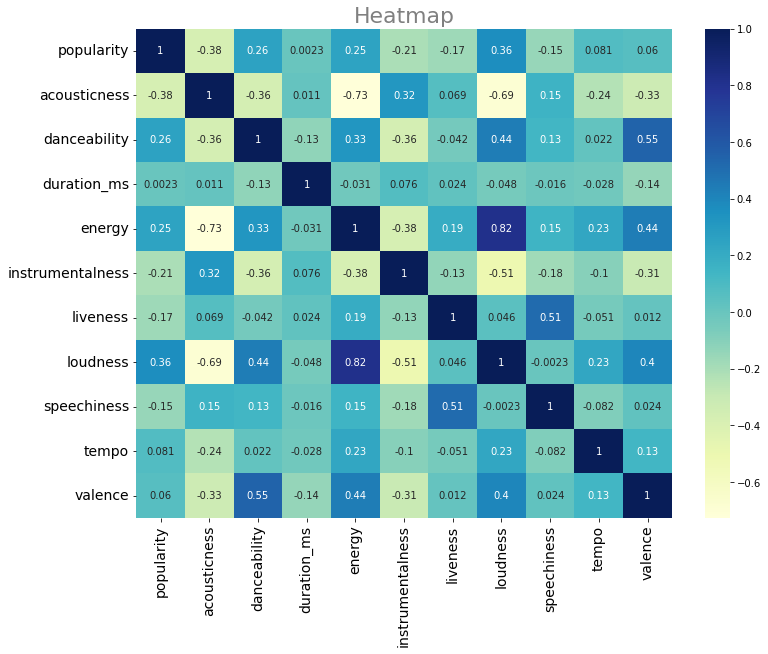

In [6]:
# Heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(df.drop(['genre','artist_name','track_name','track_id','key','time_signature'], axis=1).corr(), annot=True, cmap='YlGnBu')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Heatmap', fontsize=22, color='grey')
plt.show()

According to this heat map, the highest correlation you can see is between loudness and energy which is (0.82). Also, the popularity has high correlations with loudness (0.36), danceability (0.26), and energy (0.25). That is similar to valence, which has high correlations with danceability (0.55), energy (0.44), and loudness (0.4). To the contrary, it has the least correlation with acousticness. This could indicate that songs favoured on Spotify might be danceable, loud, and energetic. It could be Hip-Hop, Electronic, or Dance. For example, you can think of the fact that still many people love classic, Rock, or Blues.

# **Comparison:popular genre ranking in Spotify and US consumer's ranking**

Since I haven't found the reliable world-wide ranking by genre, instead I'd like to compare that of US in 2018.

"Leading music genres according to consumers in the United States as of May 2018"<br>
https://www.statista.com/statistics/442354/music-genres-preferred-consumers-usa/"<br>
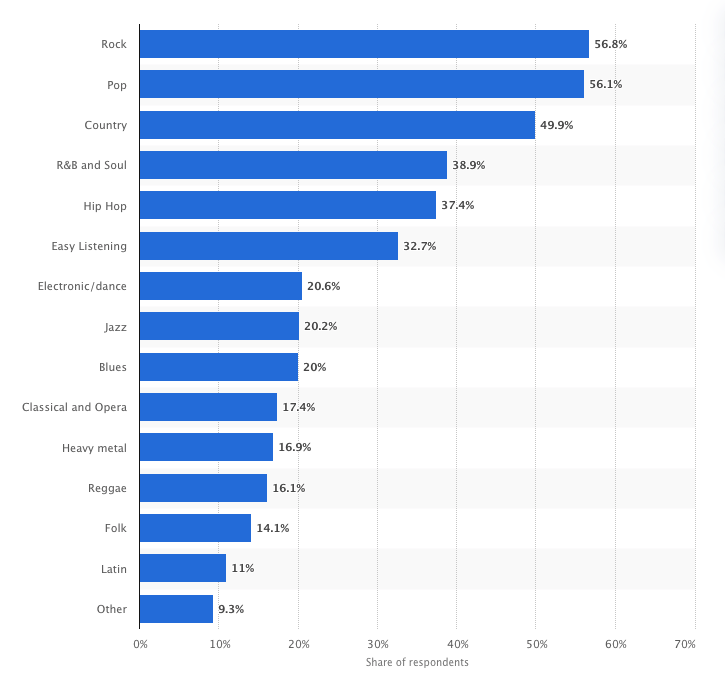



In [7]:
# sum up popularity by genre and divide them by the number of songs in each genre
genre_popularity = df[['genre','track_id', 'popularity']]
genre_count = df.groupby('genre')[['popularity']].count().sort_values(by='popularity', ascending=True)
genre_sum = df.groupby('genre')[['popularity']].sum().sort_values(by='popularity', ascending=True)

genre_rank = genre_sum.popularity / genre_count.popularity
genre_rank = genre_rank.sort_values(ascending=True)
genre_rank = pd.DataFrame(genre_rank).reset_index()

print(genre_rank)

               genre  popularity
0   Children's Music    4.252637
1          A Capella    9.302521
2              Movie   12.174097
3              Opera   13.335628
4             Comedy   21.342630
5              Anime   24.258729
6                Ska   28.612351
7          Classical   29.282195
8         Soundtrack   33.954800
9              Blues   34.742879
10             World   35.524077
11            Reggae   35.589328
12         Reggaeton   37.742915
13        Electronic   38.056095
14              Jazz   40.824383
15           Country   46.100416
16              Soul   47.027836
17              Folk   49.940209
18       Alternative   50.213430
19               R&B   52.308719
20  Children’s Music   54.659040
21             Indie   54.701561
22             Dance   57.275256
23           Hip-Hop   58.423131
24              Rock   59.619392
25               Rap   60.533795
26               Pop   66.590667


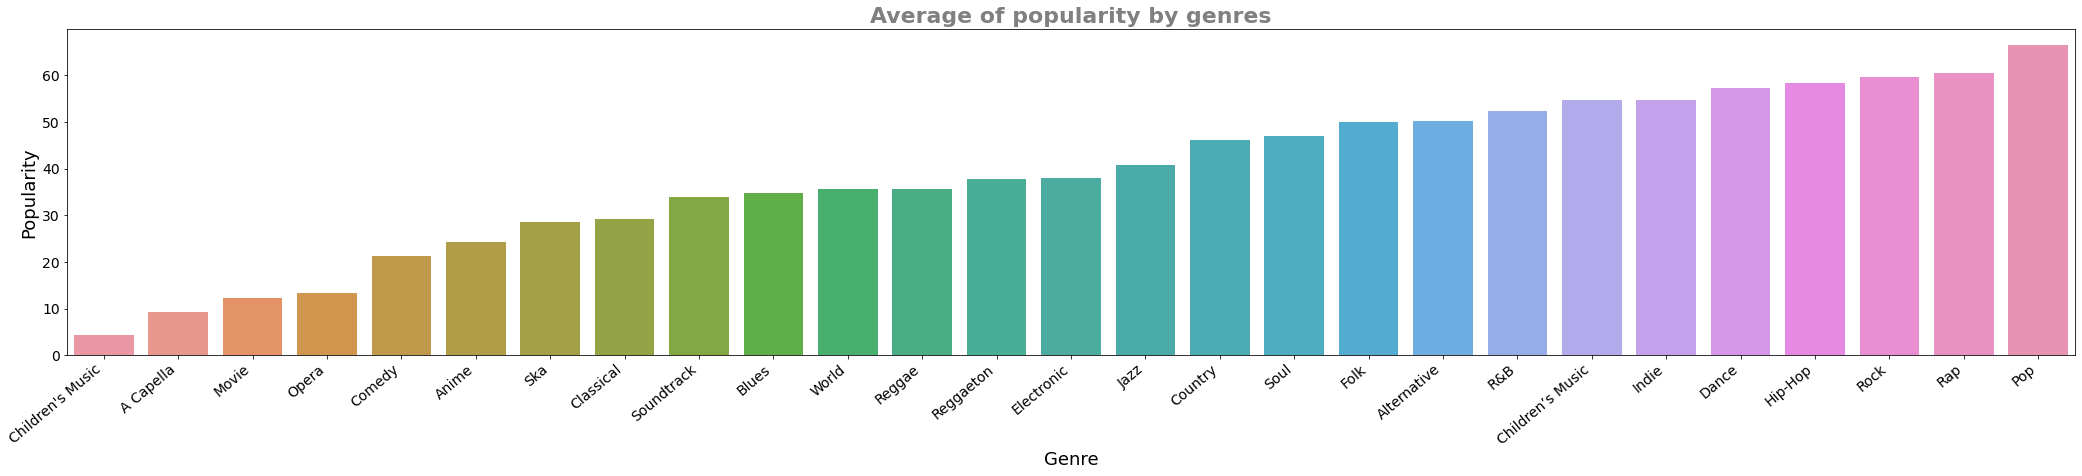

In [8]:
# Bar Chart by category and popularity
plt.figure(figsize = (36, 6))
sns.barplot(x='genre', y='popularity', data=genre_rank)

plt.xticks(fontsize=14, rotation=40,ha="right")
plt.yticks(fontsize=14)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.title('Average of popularity by genres', fontweight='bold', fontsize=22, color='grey')
plt.show()

In the ranking from statista, genre, including Rock, Country, and R & B are more popular than in the ranking from Spotify, though it may differ if I could see the world-wide ranking.
At least it suggests that in Spotify there're more danceable music fans and they might rate un-danceable music lower, which explains may genres with lower popularities.

In [3]:
# Bar Chart of Number of tracks by genres
genre_count = df.groupby('genre')[['track_id']].count().reset_index()
genre_count = genre_count.sort_values(by='track_id', ascending=True)

plt.figure(figsize = (36, 6))
sns.barplot(x='genre', y='track_id', data=genre_count)

plt.xticks(fontsize=14, rotation=40,ha="right")
plt.yticks(fontsize=14)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Number of trucks', fontsize=18)
plt.title('Number of tracks by genres', fontweight='bold', fontsize=22, color='grey')
plt.show()

NameError: name 'df' is not defined

Let’s compare the bar chart of Average of popularity by genres and Number of tracks by genres.
Unpopular genres including comedy, soundtrack, indie have higher number of tracks, but in general there’s not quite significant difference in the number of tracks other than  A Capella and Children’s music. But there’re two “Children’s music” categories, so if we can just add them up, they have the largest number of tracks.

# **Correlation with popularity and distribution of each genre**<br>
Make plots of correlation with Popularity, and that of distribution of each categories.

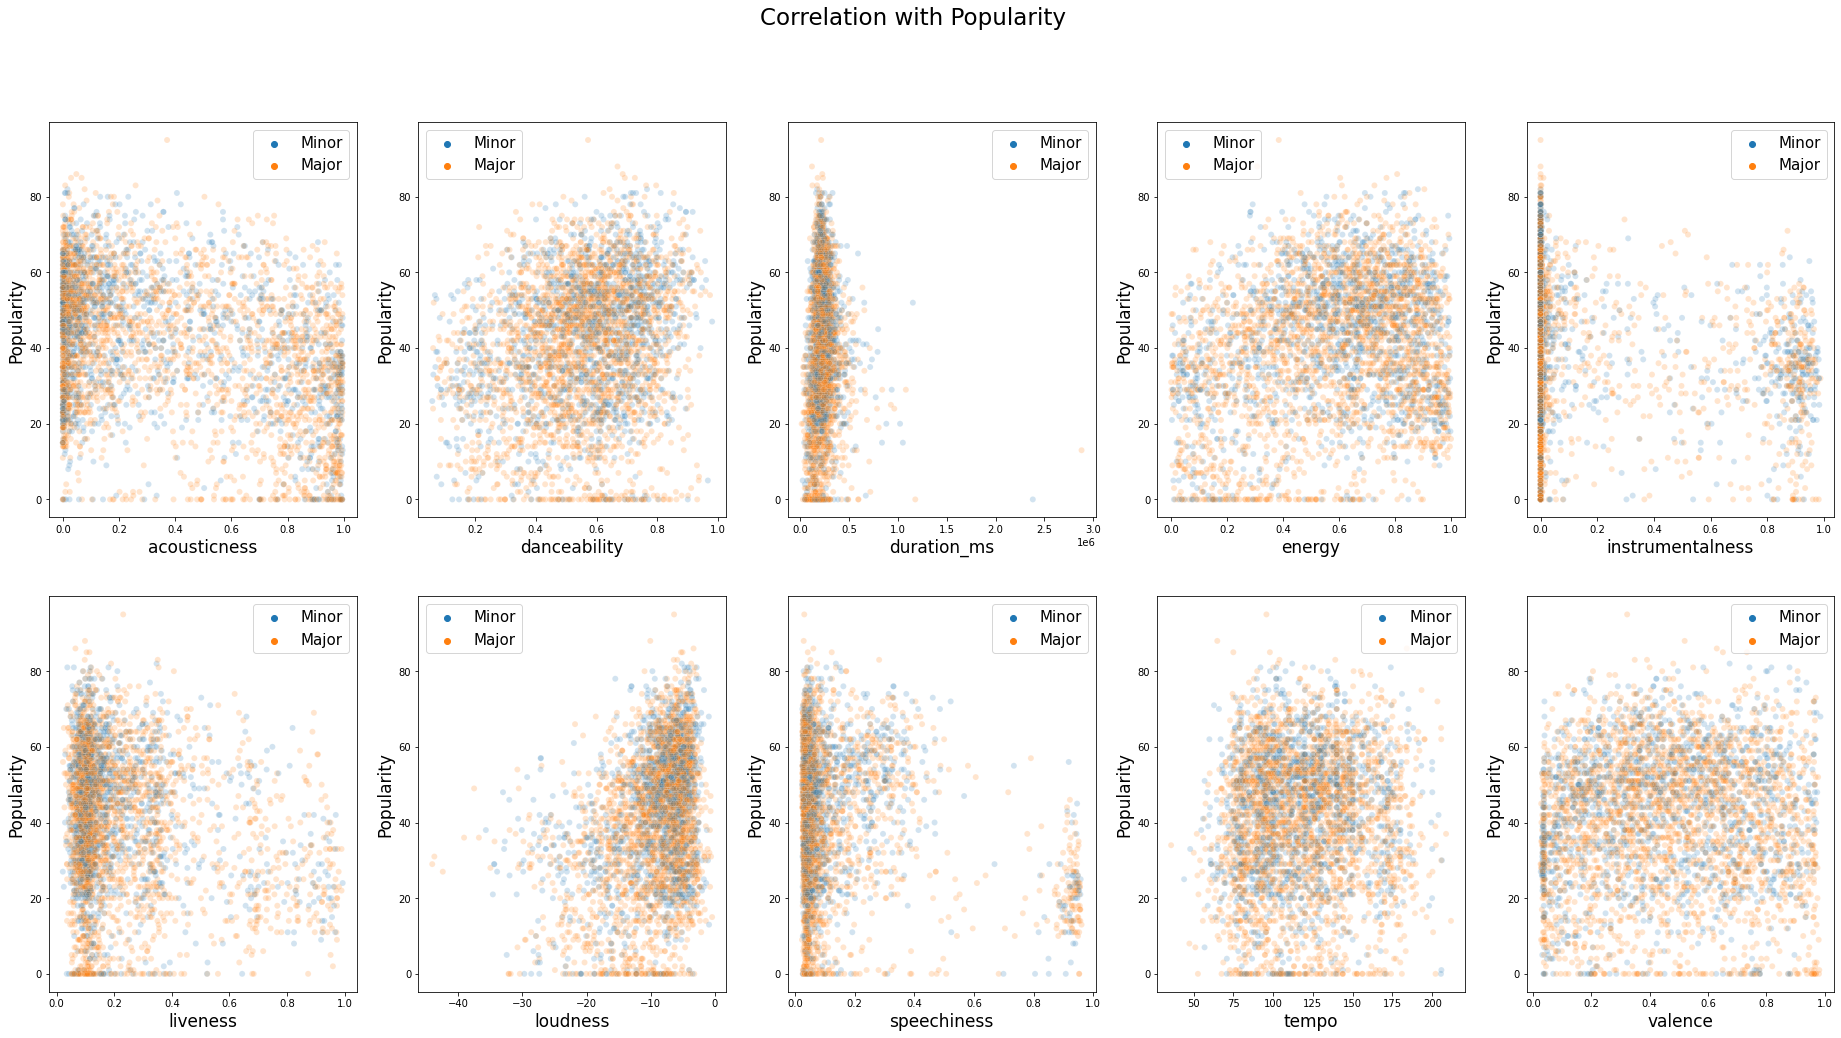

In [10]:
df_sub2 = df.sample(int(0.017*len(df)))

plt.figure(figsize=(32,16))
num1 = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness", "speechiness", "tempo", "valence"]:
    if num1<=10:
        ax = plt.subplot(2,5, num1)
        sns.scatterplot(x =col, y="popularity", data=df_sub2, hue='mode', legend = "full", alpha=0.2)
        plt.xlabel(col,fontsize = 17)
        plt.ylabel("Popularity",fontsize = 17)
        plt.legend(fontsize = 15)
    num1 +=1
plt.suptitle("Correlation with Popularity",fontsize = 23)
plt.show()

Strong correlation between popularity and loudness is clearly seen in this scatter plot too.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

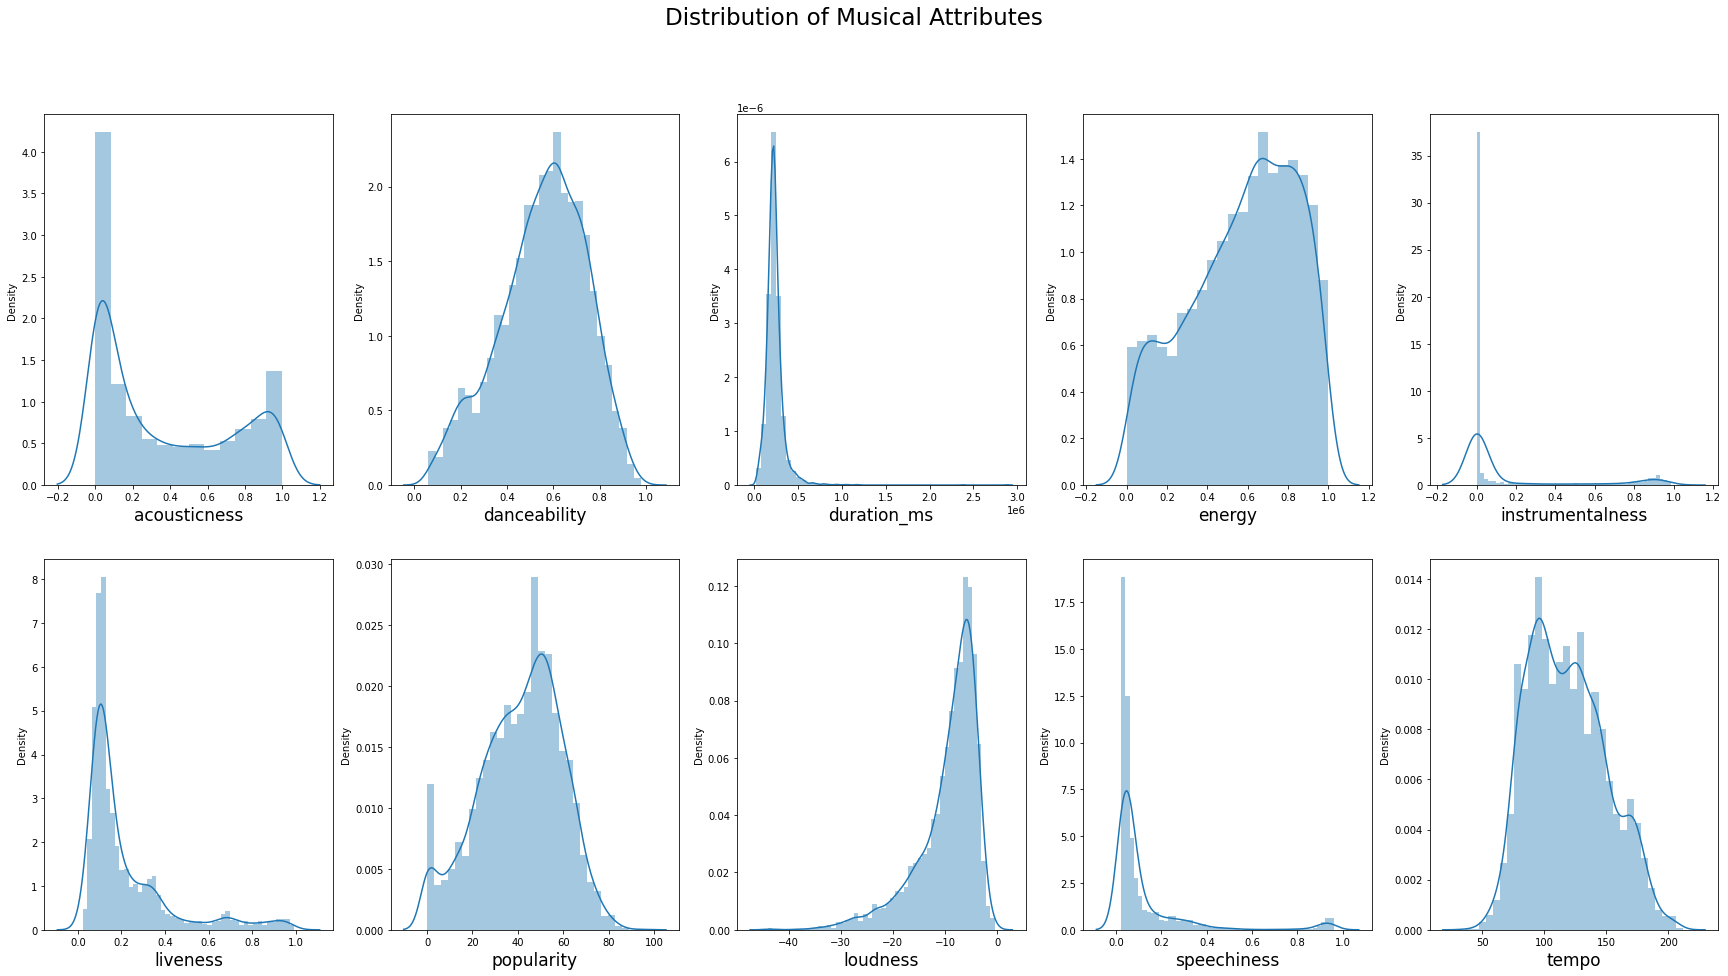

In [11]:
plt.figure(figsize=(30,15))
num2 = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness", "popularity", "loudness", "speechiness", "tempo", "valence"]:
    if num2<=10:
        ax = plt.subplot(2,5, num2)
        sns.distplot(a =df_sub2[col])
        plt.xlabel(col,fontsize = 17)
    num2 +=1
plt.suptitle("Distribution of Musical Attributes",fontsize = 23)
plt.show()

Popularity and danceability are closer to the normal distribution than others. Acousticity is clearly bimodal, liveness is skewed to the left, and loudness is skewed to the right. Because duration-ms is mostly between 0.0 and 1.0, I'll make a separate plot for this.

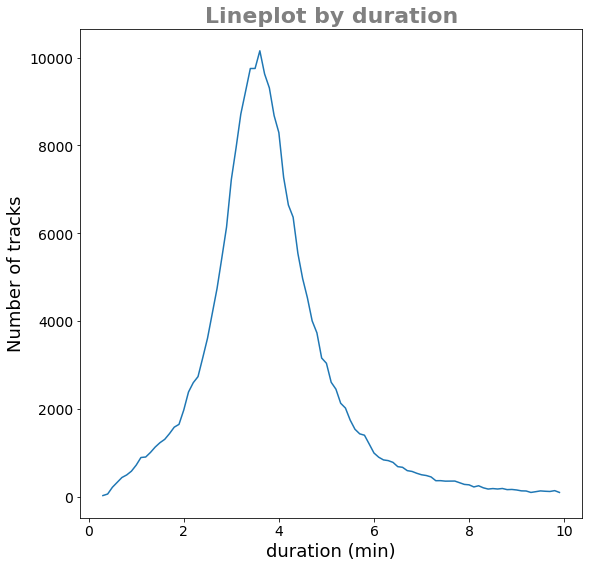

In [12]:
# Lineplot by duration
df['duration_min'] = round(df.duration_ms/1000/60, 1)
df['duration_min'] = df['duration_min'][df.duration_min < 10]

duration_count = df.groupby('duration_min')[['track_id']].count().reset_index()
duration_count = duration_count.sort_values(by='track_id', ascending=True)

plt.figure(figsize = (9, 9))
sns.lineplot(x='duration_min', y='track_id', data=duration_count)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('duration (min)', fontsize=18)
plt.ylabel('Number of tracks', fontsize=18)
plt.title('Lineplot by duration', fontweight='bold', fontsize=22, color='grey')
plt.show()

I removed outliers and only displayed those that were less than 10 minutes long. The average track lasts about 4 minutes, with most tracks lasting between 2 and 6 minutes. This may change significantly if there are more classic or other old tracks in this dataset.

# **Conclusion:**
The data shows that most people on Spotify prefer to listen to music that is loud, energetic, and good for dancing.